In [1]:
import torch 
import torchvision
import numpy as np
import PIL

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [15, 8]

In [17]:
DATA_PATH = './data'

In [22]:
def load_data(path):
    transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
    ])
    
    dataset = torchvision.datasets.ImageFolder(root=path, transform=transforms)
    return dataset 
dataset = load_data(DATA_PATH)

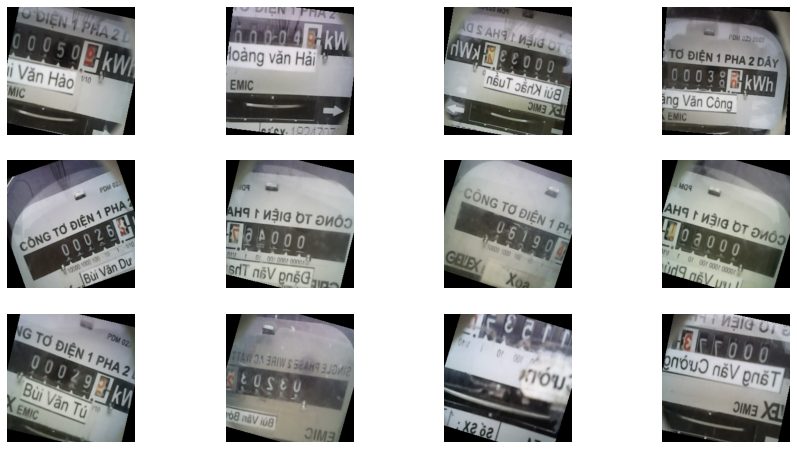

In [48]:
index = 0
fig, axs = plt.subplots(3, 4)
for i in range(3):
    for j in range(4):        
        axs[i][j].imshow(np.asarray((dataset[index][0])))
        axs[i][j].axis('off')
        index += 1

In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt 

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

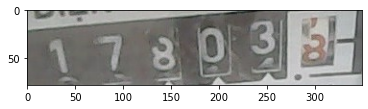

In [96]:
PATH = r"./test_1.jpg"
image = cv2.imread(PATH)
plt.imshow(image[:,:,::-1])

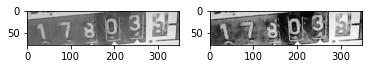

In [122]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_histogram = cv2.equalizeHist(image_gray)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image_gray, cmap='gray')
axs[1].imshow(image_histogram, cmap='gray')

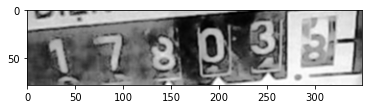

In [98]:
blur = cv2.GaussianBlur(image_histogram, (3,3), 0)
plt.imshow(blur, cmap='gray')

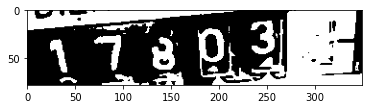

In [99]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap='gray')

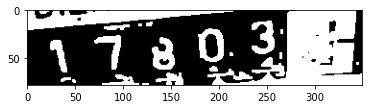

In [101]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening, cmap='gray')

In [132]:
data = pytesseract.image_to_string(opening, lang='eng', config='--psm 7 -c tessedit_char_whitelist=0123456789')
print(data)

47303



In [127]:
height = image.shape[0]
width = image.shape[1]

d = pytesseract.image_to_boxes(image_gray, output_type=pytesseract.Output.DICT, lang='eng', config='--psm 6 -c tessedit_char_whitelist=0123456789')

#print result
print("Predict: ", d['char'])

image_copy = image.copy()
n_boxes = len(d['char'])
for i in range(n_boxes):
    (text,x1,y2,x2,y1) = (d['char'][i],d['left'][i],d['top'][i],d['right'][i],d['bottom'][i])
    cv2.rectangle(image_copy, (x1,height-y1), (x2,height-y2) , (0,255,0), 2)

plt.imshow(image_copy[:,:,::-1])

IndexError: list index out of range